In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
data = pd.read_csv('housing.csv')

In [144]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [146]:
data.dropna(inplace=True)

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [148]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value']



In [149]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [150]:
train_data = x_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

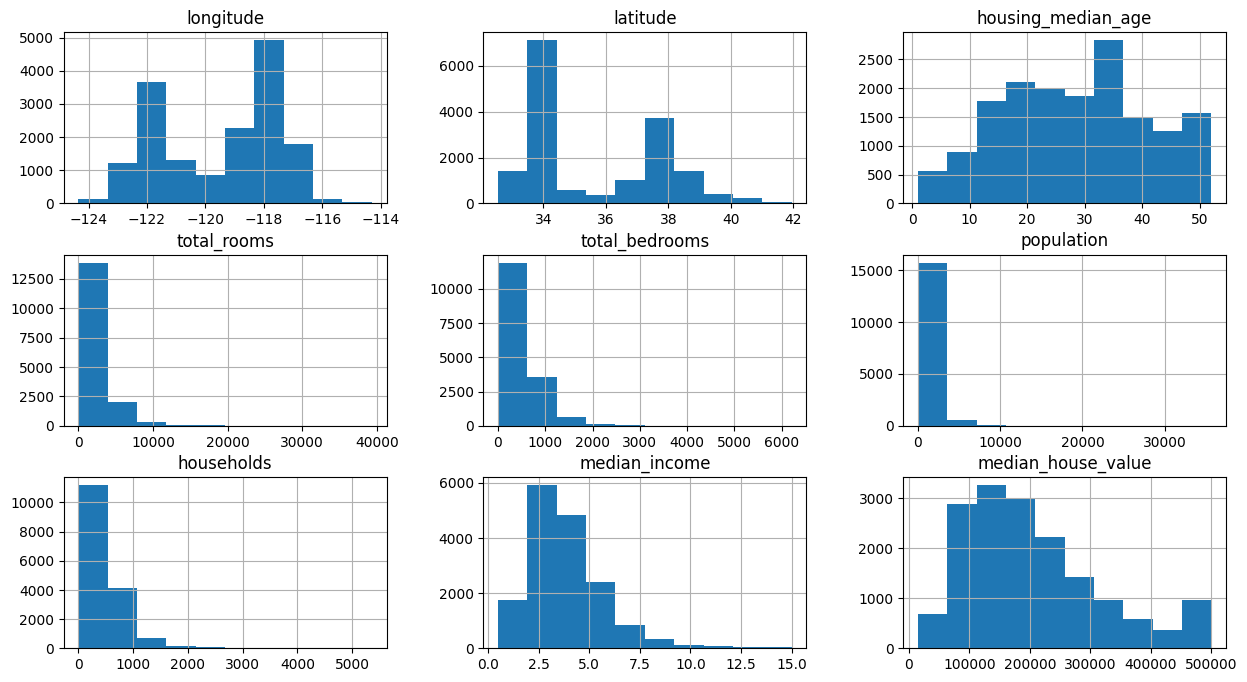

In [151]:
train_data.hist(figsize = (15,8))

<Axes: >

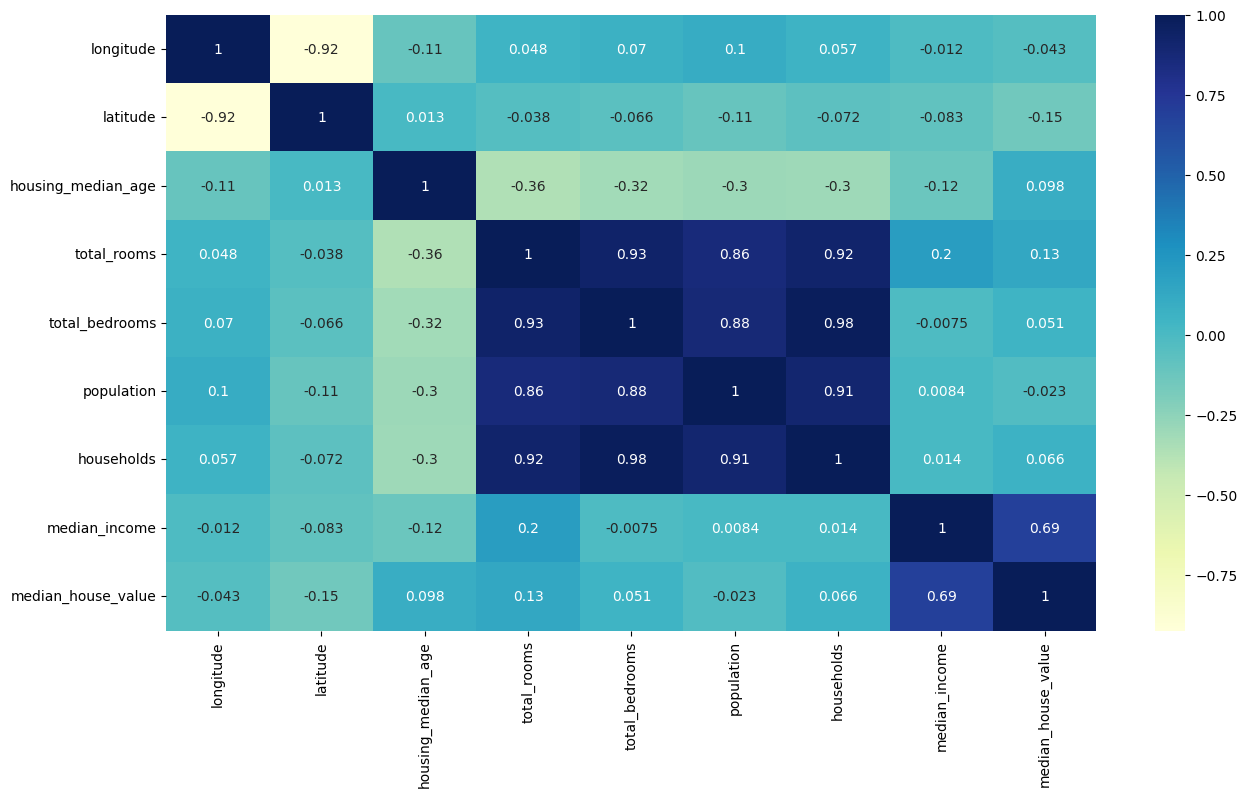

In [152]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True,cmap="YlGnBu")

In [153]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

In [154]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis=1)
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17952,-121.96,37.34,37.0,6.498282,4.852030,5.683580,4.890349,3.7813,247800.0,1,0,0,0,0
11755,-121.20,38.73,11.0,8.496582,6.456770,7.566311,6.424869,7.7499,334800.0,0,1,0,0,0
9433,-122.80,38.18,36.0,7.774436,6.167516,6.864848,5.894403,3.6250,253100.0,0,0,0,0,1
19870,-119.36,36.33,11.0,8.077758,6.426488,7.209340,6.338594,2.9844,132000.0,0,1,0,0,0
10184,-117.94,33.88,46.0,7.466228,5.746203,6.647688,5.693732,5.4217,256000.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,-121.89,38.01,28.0,8.199739,6.622736,7.767687,6.464588,3.0042,103900.0,0,1,0,0,0
140,-122.18,37.81,30.0,5.680173,3.663562,4.844187,3.970292,6.3624,483300.0,0,0,0,1,0
632,-122.16,37.72,38.0,6.915723,5.505332,6.428105,5.480639,2.8750,144800.0,0,0,0,1,0
17865,-121.89,37.42,26.0,3.713572,2.197225,3.970292,2.079442,7.7197,225000.0,1,0,0,0,0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 1500x800 with 0 Axes>

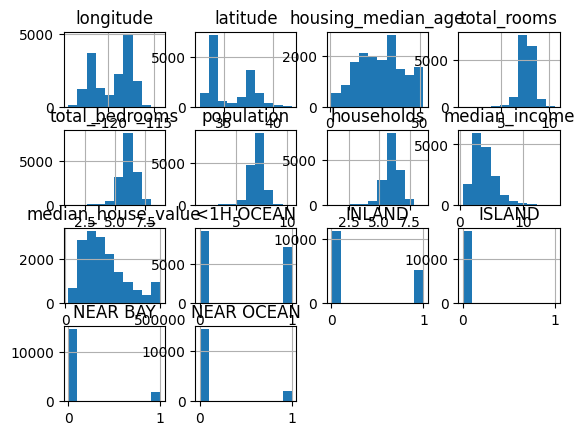

In [155]:
plt.figure(figsize=(15,8))
train_data.hist()

In [156]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17952,-121.96,37.34,37.0,6.498282,4.852030,5.683580,4.890349,3.7813,247800.0,1,0,0,0,0
11755,-121.20,38.73,11.0,8.496582,6.456770,7.566311,6.424869,7.7499,334800.0,0,1,0,0,0
9433,-122.80,38.18,36.0,7.774436,6.167516,6.864848,5.894403,3.6250,253100.0,0,0,0,0,1
19870,-119.36,36.33,11.0,8.077758,6.426488,7.209340,6.338594,2.9844,132000.0,0,1,0,0,0
10184,-117.94,33.88,46.0,7.466228,5.746203,6.647688,5.693732,5.4217,256000.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,-121.89,38.01,28.0,8.199739,6.622736,7.767687,6.464588,3.0042,103900.0,0,1,0,0,0
140,-122.18,37.81,30.0,5.680173,3.663562,4.844187,3.970292,6.3624,483300.0,0,0,0,1,0
632,-122.16,37.72,38.0,6.915723,5.505332,6.428105,5.480639,2.8750,144800.0,0,0,0,1,0
17865,-121.89,37.42,26.0,3.713572,2.197225,3.970292,2.079442,7.7197,225000.0,1,0,0,0,0


<Axes: xlabel='latitude', ylabel='longitude'>

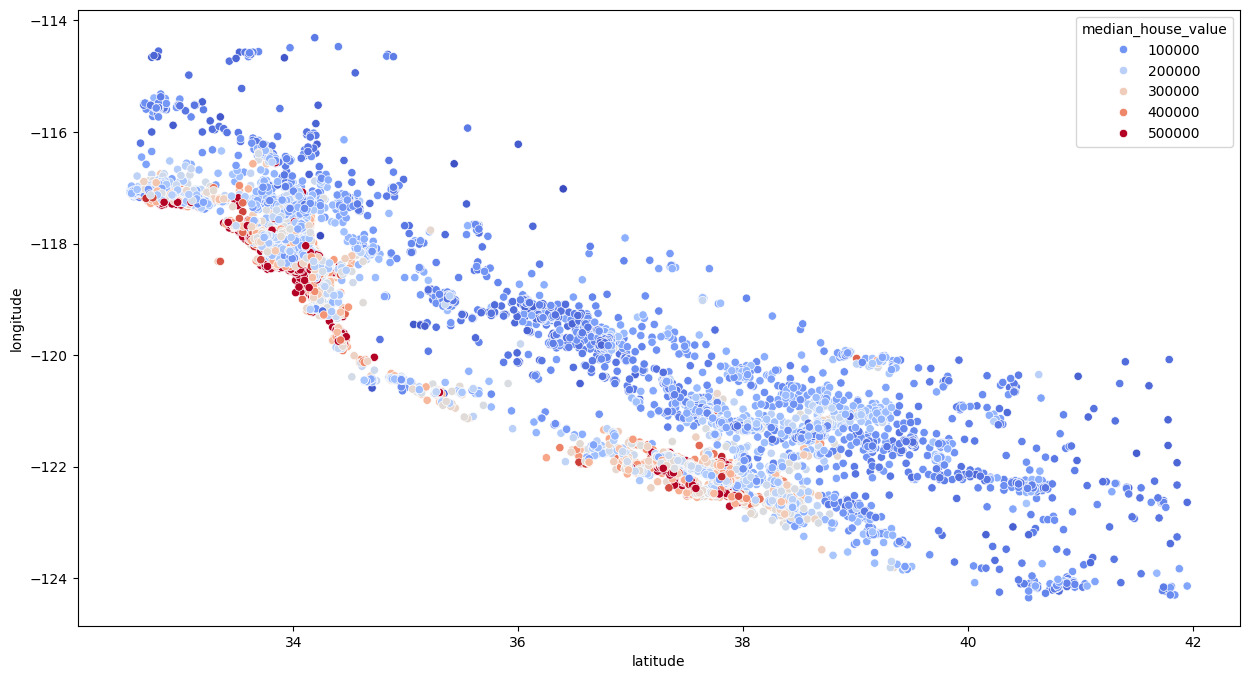

In [157]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette='coolwarm')

In [158]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

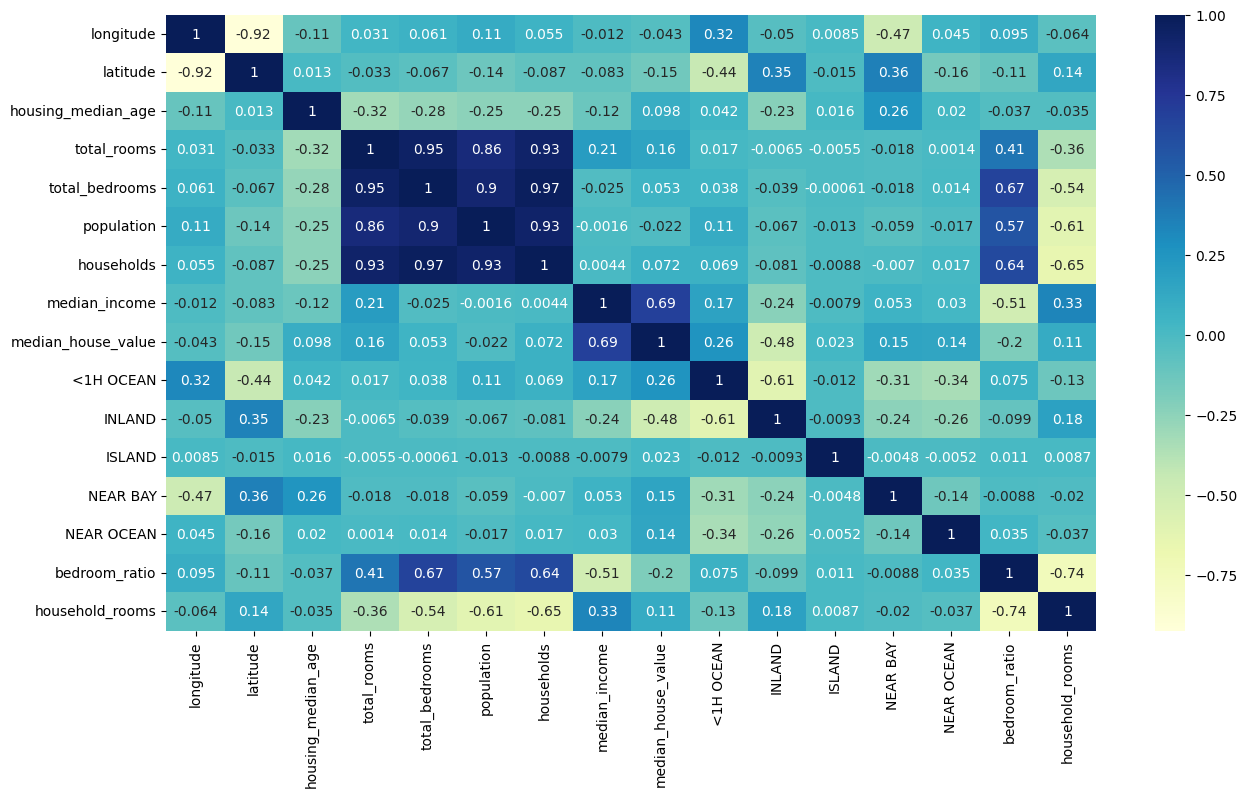

In [159]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")

In [160]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
17952,-121.96,37.34,37.0,6.498282,4.852030,5.683580,4.890349,3.7813,247800.0,1,0,0,0,0,0.746664,1.328797
11755,-121.20,38.73,11.0,8.496582,6.456770,7.566311,6.424869,7.7499,334800.0,0,1,0,0,0,0.759926,1.322452
9433,-122.80,38.18,36.0,7.774436,6.167516,6.864848,5.894403,3.6250,253100.0,0,0,0,0,1,0.793307,1.318952
19870,-119.36,36.33,11.0,8.077758,6.426488,7.209340,6.338594,2.9844,132000.0,0,1,0,0,0,0.795578,1.274377
10184,-117.94,33.88,46.0,7.466228,5.746203,6.647688,5.693732,5.4217,256000.0,1,0,0,0,0,0.769626,1.311306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,-121.89,38.01,28.0,8.199739,6.622736,7.767687,6.464588,3.0042,103900.0,0,1,0,0,0,0.807676,1.268409
140,-122.18,37.81,30.0,5.680173,3.663562,4.844187,3.970292,6.3624,483300.0,0,0,0,1,0,0.644974,1.430669
632,-122.16,37.72,38.0,6.915723,5.505332,6.428105,5.480639,2.8750,144800.0,0,0,0,1,0,0.796060,1.261846
17865,-121.89,37.42,26.0,3.713572,2.197225,3.970292,2.079442,7.7197,225000.0,1,0,0,0,0,0.591674,1.785851


In [161]:
from sklearn.linear_model import LinearRegression

x_train,y_train = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [163]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity,dtype=int)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


In [164]:
x_test,y_test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [165]:
reg.score(x_test,y_test)

0.6848795375057661

In [167]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

forest = RandomForestRegressor()

scaler = StandardScaler()

x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.fit_transform(x_test)

forest.fit(x_train_s,y_train)

forest.score(x_test_s,y_test)

0.8146237562146753